# Homework 7

Προβλέψτε την εξέλιξη του διαβήτη χρησιμοποιώντας Random Forests σε μια ροή εργασιών με cross-validation.

In [1]:
from sklearn import datasets 
diabetes_set = datasets.load_diabetes()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

In [3]:
# Join 
df_diabetes = pd.DataFrame(diabetes_set.data, columns = diabetes_set.feature_names) # put data into a DataFrame 
df_diabetes['PROGR'] = pd.Series(diabetes_set.target) # target is a measure of the progression of the disease 
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,PROGR
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
# Clean 
missing_values = ["n/a", "na", "--", 999,9999]  # Making a list of missing value types
df_diabetes.replace(to_replace = missing_values, value = np.nan, inplace = True) # Replace values
df_diabetes.dropna(inplace=True) # Drop lines containing NaNs 
ls_lines_to_drop = [0, 1, 2, 3, 4]
df_diabetes.drop(ls_lines_to_drop, inplace=True)
df_diabetes.reset_index(drop=True, inplace=True)  # Reindex the dataframe.
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,PROGR
0,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
1,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
2,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
3,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
4,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0
...,...,...,...,...,...,...,...,...,...,...,...
432,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
433,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
434,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
435,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Decision Tree - cv

Mean of r2 scores: -0.16 
Standard deviation of r2 scores: 0.27


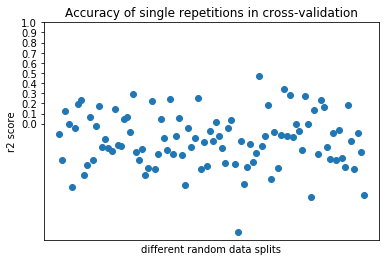

In [5]:
X = df_diabetes.drop(columns = 'PROGR')
y = df_diabetes['PROGR']
r2_scores = []
ls_true_values = []
ls_predicted_values = []
# Cross-Validation (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Loop 
for i_train, i_test in our_cv.split(X):
    
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # decision tree
    dec_tree = DecisionTreeRegressor()
    # Fitting 
    dec_tree.fit(X_train, y_train)
    # Predicting the testing data
    y_pred_test = dec_tree.predict(X_test)
    # R2 score
    r2 = round(dec_tree.score(X_test, y_test), 2)
    # Append score to the list of R2 scores
    r2_scores.append(r2)
    ls_true_values.append(y_test)
    ls_predicted_values.append(y_pred_test)
# Plot 1
#Calculating mean and standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))
# Plotting accuracy of different random splits
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

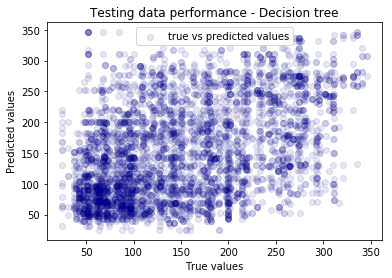

In [6]:
# Plot 2
# Concatenate data for plotting
ls_predicted_values = np.concatenate(ls_predicted_values)
ls_true_values = np.concatenate(ls_true_values)
# scatter plot
s1 = plt.scatter(ls_predicted_values, ls_true_values, color='darkblue', 
                 marker='o', alpha = 0.1, label = 'true vs predicted values')
# Add labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# Add title
plt.title('Testing data performance - Decision tree')
# Add legend 
plt.legend()
# final plot
plt.show()

Λοιπόν, τώρα βλέπετε τι εννοούσαμε με καλές προβλέψεις σχηματίζοντας μια περισσότερο ή λιγότερο ευθεία γραμμή. Αυτό το παράδειγμα δείχνει πώς **δεν** θα έπρεπε να είναι.
Ας δούμε αν μπορούμε να τα πάμε καλύτερα!

# Random forest - cv

In [7]:
X = df_diabetes.drop(columns = 'PROGR')
y = df_diabetes['PROGR'] 
r2_scores = []
ls_true_values = []
ls_predicted_values = []
# Cross-Validation (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Loop 
for i_train, i_test in our_cv.split(X):
    # Define our training and test set according to current split
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # Instanciate random forests
    rf_regr = RandomForestRegressor(n_estimators=100) # n_estimators is the number of trees in the forest
    # Fitting the tree
    rf_regr.fit(X_train, y_train)
    # Predicting the testing data
    y_pred_test = rf_regr.predict(X_test)
    # Computing the R2 score
    r2 = round(rf_regr.score(X_test, y_test), 2)
    # Append score to the list of R2 scores
    r2_scores.append(r2)
    ls_true_values.append(y_test)
    ls_predicted_values.append(y_pred_test)

Mean of r2 scores: 0.4 
Standard deviation of r2 scores: 0.12


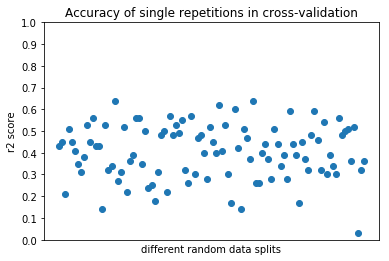

In [8]:
# Plot 1
#Calculating mean and standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))
# Plotting accuracy of different random splits
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

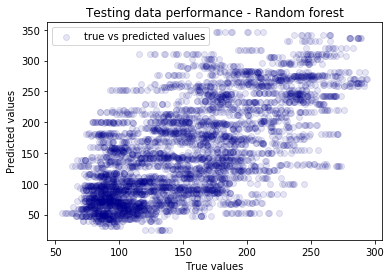

In [9]:
# Plot 2
# Concatenate data for plotting
ls_predicted_values = np.concatenate(ls_predicted_values)
ls_true_values = np.concatenate(ls_true_values)
# Plot data as a scatter plot
s1 = plt.scatter(ls_predicted_values, ls_true_values, color='darkblue', 
                 marker='o', alpha = 0.1, label = 'true vs predicted values')
# Add labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# Add title
plt.title('Testing data performance - Random forest')
# Add legend to see labels of data
plt.legend()
# Show final plot
plt.show()

# Βελτιστοποιήστε το βάθος των δέντρων στο τυχαίο δάσος

Σημείωση: Και οι δύο αυτές μέθοδοι εξαρτώνται από το συντονισμό υπερπαραμέτρων. Εδώ εφαρμόσαμε το βέλτιστο βάθος για το τυχαίο δάσος. 


Best performance: 0.43098913236073555
Best depth: 4


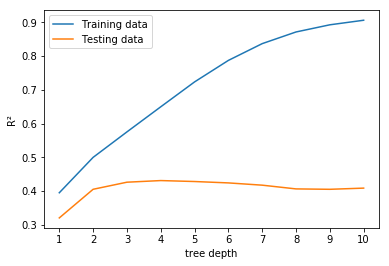

In [10]:
# Initialize empty list (to be filled with average results afterwards) 
ls_total_r2_test = []
ls_total_r2_train = []
# Initialize empty list (to be filled with max depth afterwards)
ls_max_depth = []
# loop for dt depths 1 to 10 
for current_max_depth in np.arange(10): 
    # Instantiate repeated cross validation (cv) object
    our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
    # Which model: Instantiate decision trees (dt) regression
    rf_regr = RandomForestRegressor(max_depth=current_max_depth+1, n_estimators=100)
    # initialize empty list for single cv loop results
    ls_r2_test = []
    ls_r2_train = []
    # Loop to make cross validation
    for i_train, i_test in our_cv.split(X):
        # 1. Split data into training and test set
        X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
        # 2. Train DT regressor with train data - fit the model with training data
        rf_regr.fit(X_train, y_train)
        # 3. Test regressor with test data
        y_pred_test = rf_regr.predict(X_test)
        y_pred_train = rf_regr.predict(X_train)
        # 4. Calc metric (e.g. r2)
        current_r2_test = r2_score(y_test, y_pred_test)
        current_r2_train = r2_score(y_train, y_pred_train)
        # 5. Append to list
        ls_r2_test.append(current_r2_test)
        ls_r2_train.append(current_r2_train)
        #final: should be 100 values - 10 subsets *10 repeats
    # 6. append max depth
    ls_max_depth.append(current_max_depth+1)
    # append mean of 100 r2 to list
    ls_total_r2_test.append(np.mean(ls_r2_test))  
    ls_total_r2_train.append(np.mean(ls_r2_train))  
# final: 10 values – for every depth - one mean value
print('Best performance: {}\nBest depth: {}'.format(max(ls_total_r2_test), np.argmax(ls_total_r2_test)+1))
# plot of R2 values over depths
plt.plot(ls_max_depth, ls_total_r2_train, label="Training data")
plt.plot(ls_max_depth, ls_total_r2_test, label="Testing data")
plt.xticks(np.arange(10)+1)
plt.xlabel('tree depth')
plt.ylabel('R²')
plt.legend()
plt.show()

To Decision tree classifier μπορεί επίσης να βελτιωθεί με τον περιορισμό του βάθους του. Δοκιμάστε max_depth = 3 και εκτελέστε ξανά τις προβλέψεις δέντρο απόφασης.